<a href="https://colab.research.google.com/github/OskarKrafft/pb4/blob/main/Problem_Set_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Set 4, Lab 8 (Group 2)
### Date: 11.11.2022
### Author: Oskar Krafft, Fabian Pawelczyk, Justus v. Samson-Himmelstjerna

## Excercise in teams

In [ ]:
# Use this data

import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

penguins = pd.read_csv("penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)


Create a decision tree classifier with a maximum depth of 2 levels and fit the training data. Once this classifier is trained, plot the data and the decision boundary to see the benefit of increasing the depth. To plot the decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)

tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=2)

Did we make use of the feature “Culmen Length”? Plot the tree using the function sklearn.tree.plot_tree to find out!

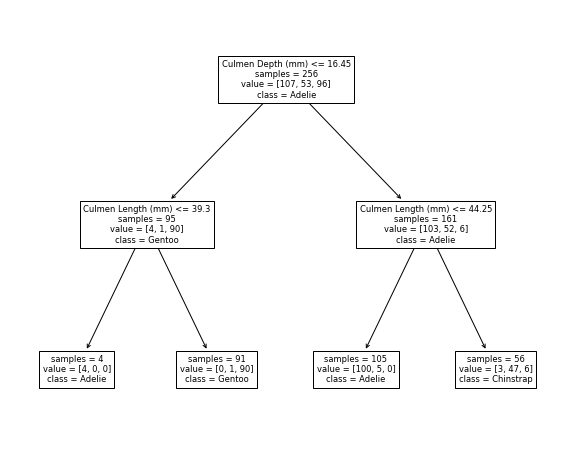

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize = (10, 8))

_ = plot_tree(tree, feature_names = culmen_columns, 
              class_names = tree.classes_, impurity=False, ax=ax)


Compute the accuracy of the decision tree on the testing data.

In [ ]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy DecisionTreeClassifier: {test_score:.2f}")

Accuracy DecisionTreeClassifier: 0.97


## Decision Tree for regression

In [ ]:
uploaded = files.upload()
penguins = pd.read_csv("penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

Saving penguins_regression.csv to penguins_regression.csv


To illustrate how decision trees are predicting in a regression setting, we will create a synthetic dataset containing all possible flipper length from the minimum to the maximum of the original data.

In [ ]:
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

Computing an evaluation metric on such a synthetic test set is meaningless since the synthetic dataset does not follow the same distribution as the real world data on which the model will be deployed, but we are using it here for educational purposes.

In [ ]:
# Linear model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

# Predict on the synthetic data set
target_predicted = linear_model.predict(data_test)

On the plot above, we see that a Linear Regression is able to fit the data, and the predictions based on the synthetic data all fit inside the prediction line.

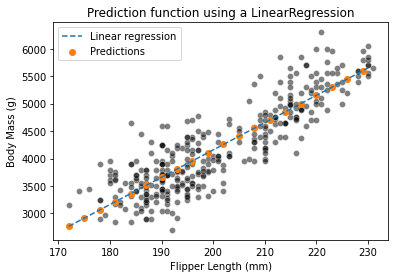

In [ ]:
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression",
         linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Predictions",
            color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

Contrary to linear models, decision trees are non-parametric models: they do not make assumptions about the way data is distributed. This will affect the prediction scheme.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

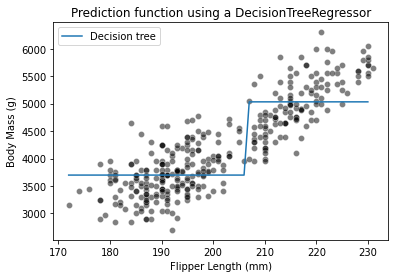

In [ ]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

We see that the decision tree model does not have an a priori distribution for the data and we do not end-up with a straight line to regress flipper length and body mass.

Instead, we observe that our feature space was split into two partitions.

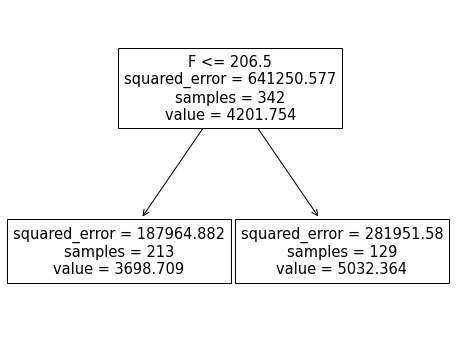

In [ ]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names = feature_name, ax=ax)

The threshold for the is 206.5 mm. The predicted values on each side of the split are two constants: 3698.71 g and 5032.36 g(mean values of the training samples in each partition).

Let’s check the effect of increasing the depth in a regression setting:

In [ ]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

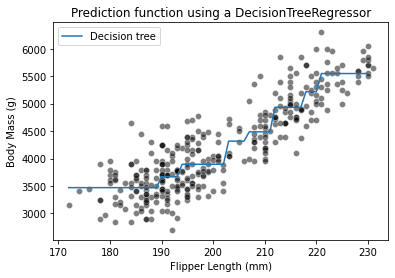

In [ ]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Increasing the depth of the tree will increase the number of partition: increasing the number of constant values that the tree predicts.


## Excerise in teams

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [ ]:

uploaded = files.upload()

penguins = pd.read_csv("penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


lr_model = LinearRegression()

lr_model.fit(data_train, target_train)

d_tree = DecisionTreeRegressor(max_depth=3)
d_tree.fit(data_train, target_train)

Saving penguins_regression.csv to penguins_regression (2).csv


DecisionTreeRegressor(max_depth=3)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(data_train, target_train)

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from the minimum to the maximum of the training dataset. Get the predictions of each model using this dataset.

In [ ]:
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].min()),
                                   columns=[feature_name])
linear_pred = linear_model.predict(data_test)
tree_pred = tree.predict(data_test)

ValueError: ignored

Create a scatter plot containing the training samples and superimpose the predictions of both models on the top.

In [ ]:
# Write your code here



Create a dataset containing values below and above the minimum and the maximum of the flipper length seen during training.

In [ ]:
# Write your code here

Finally, make predictions with both models on this new interval of data. Repeat the plotting of the previous exercise.

In [ ]:
# Write your code here

### Other Hyperparameters 

The max_depth hyperparameter controls the overall complexity of the tree. This parameter is adequate under the assumption that a tree is built symmetrically. However, there is no guarantee that a tree will be symmetrical. Indeed, optimal generalization performance could be reached by growing some of the branches deeper than some others.

We will build a dataset where we will illustrate this asymmetry.

In [ ]:
data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("penguins_classification.csv")

data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("penguins_regression.csv")

In [ ]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0)
# Blobs that will be easily separated
X_2, y_2 = make_blobs(
    n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column])
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

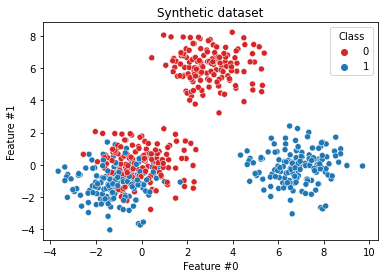

In [ ]:
sns.scatterplot(data=data_clf, x=data_clf_columns[0], y=data_clf_columns[1],
                hue=target_clf_column, palette=["tab:red", "tab:blue"])
_ = plt.title("Synthetic dataset")

We will first train a shallow decision tree with max_depth=2. We would expect this depth to be enough to separate the blobs that are easy to separate.

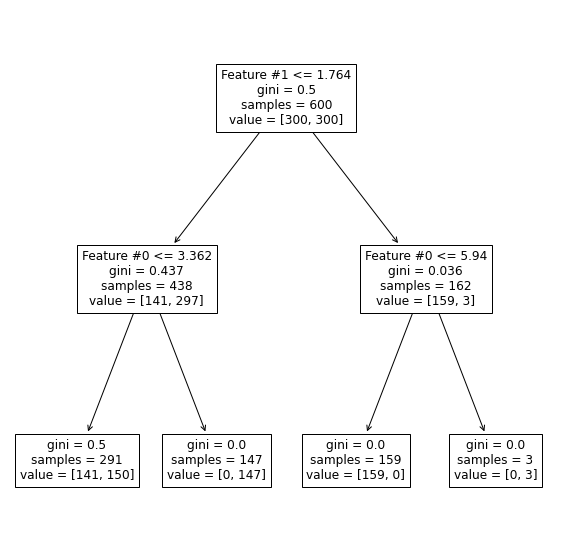

In [ ]:
from sklearn.tree import plot_tree

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)

tree_clf.fit(data_clf[data_clf_columns], data_clf[target_clf_column])

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

We see that the right branch achieves perfect classification. Now, we increase the depth to check how the tree will grow.

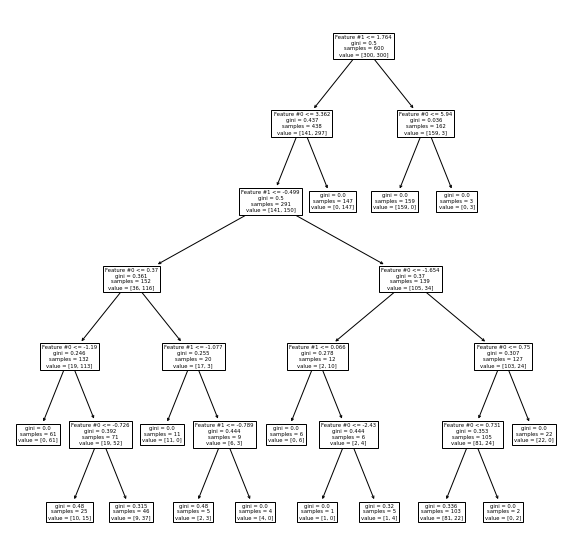

In [ ]:
max_depth = 6

tree_clf = DecisionTreeClassifier(max_depth=max_depth)

tree_clf.fit(data_clf[data_clf_columns], data_clf[target_clf_column])

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

As expected, the left branch of the tree continue to grow while no further splits were done on the right branch. Fixing the max_depth parameter would cut the tree horizontally at a specific level, whether or not it would be more beneficial that a branch continue growing.

The hyperparameters min_samples_leaf, min_samples_split, max_leaf_nodes, or min_impurity_decrease allows growing asymmetric trees and apply a constraint at the leaves or nodes level.

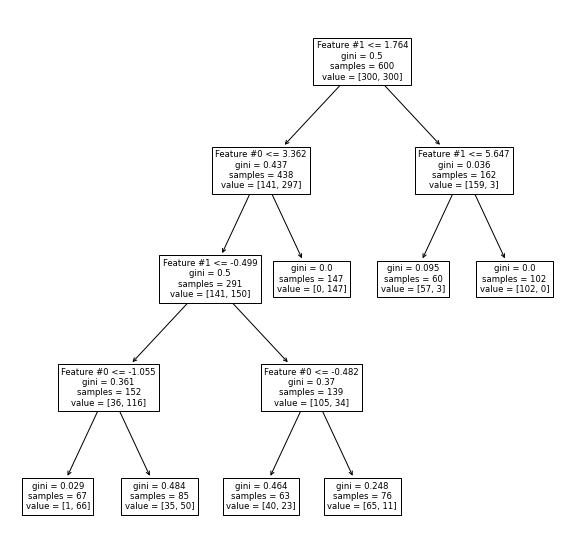

In [ ]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)

tree_clf.fit(data_clf[data_clf_columns], data_clf[target_clf_column])

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

This hyperparameter allows to have leaves with a minimum number of samples and no further splits will be searched otherwise. Therefore, these hyperparameters could be an alternative to fix the max_depth hyperparameter.

## Random Forests

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

Random forests have another particularity: when training a tree, the search for the best split is done only on a subset of the original features taken at random. The goal is to inject additional randomization into the learning procedure to try to decorrelate the prediction errors of the individual trees.

In [ ]:
import pandas as pd

adult_census = pd.read_csv("adult-census.csv")
target_name = "class"
data = adult_census.drop(columns=[target_name, "education-num"])
target = adult_census[target_name]

The adult census contains some categorical data and we encode the categorical features using an OrdinalEncoder since tree-based models can work very efficiently with such a naive representation of categorical variables.

Since there are rare categories in this dataset we need to specifically encode unknown categories at prediction time in order to be able to use cross-validation. Otherwise some rare categories could only be present on the validation side of the cross-validation split and the OrdinalEncoder would raise an error when calling its transform method with the data points of the validation set.



In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = make_column_transformer(
    (categorical_encoder, make_column_selector(dtype_include=object)),
    remainder="passthrough"
)

We will first give a simple example where we will train a single decision tree classifier and check its generalization performance via cross-validation.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

tree = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=0))

In [ ]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, data, target, cv = 5)

print(f"Decision tree classifier: "
      f"{scores_tree.mean():.3f} ± {scores_tree.std():.3f}")

Decision tree classifier: 0.820 ± 0.006


Now, we will use a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = make_pipeline(
    preprocessor,
    RandomForestClassifier(n_estimators=50, n_jobs=2, random_state=0)
)

In [ ]:
scores_random_forest = cross_val_score(random_forest, data, target)

print(f"Random forest classifier: "
      f"{scores_random_forest.mean():.3f} ± "
      f"{scores_random_forest.std():.3f}")

Random forest classifier: 0.851 ± 0.004


## Excercise in Teams

In [ ]:
# Use this data

import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

Create a random forest containing three trees. Train the forest and check the generalization performance on the testing set in terms of mean absolute error.



In [ ]:
# Write your code here



We now aim to plot the predictions from the individual trees in the forest. For that purpose you have to create first a new dataset containing evenly spaced values for the flipper length over the interval between 170 mm and 230 mm.

In [ ]:
# Write your code here 



The trees contained in the forest that you created can be accessed with the attribute estimators_. Use them to predict the body mass corresponding to the values in this newly created dataset. Similarly find the predictions of the random forest in this dataset.

In [ ]:
# Write your code here

